In [26]:
import numpy
import matplotlib.pyplot as plt
from BayesicFitting import SplinesModel
from BayesicFitting import Fitter
from BayesicFitting import formatter as fmt

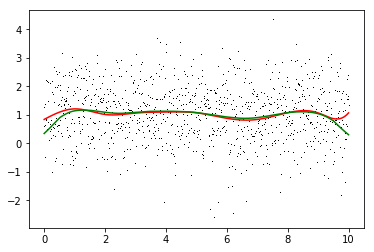

In [42]:
x = numpy.arange( 1001, dtype=float ) / 100
y = numpy.random.randn( 1001 ) + 1
knots = numpy.arange( 11, dtype=float )
par = numpy.zeros( sm.npchain, dtype=float )

sm = SplinesModel( knots=knots )

ftr = Fitter( x, sm )
par = ftr.fit( y )

plt.plot( x, y, 'k,' )
plt.plot( x, sm( x ), 'r-' )
n = 50
tophat = numpy.ones( 2 * n + 1, dtype=float ) / ( 2*n)
smfl = numpy.convolve( y, tophat, "full" )[n:-n]
smfl = numpy.convolve( smfl, tophat, "full" )[n:-n]
smfl = numpy.convolve( smfl, tophat, "full" )[n:-n]
plt.plot( x, smfl, 'g-' )
plt.show()

#print( fmt( sm.partial( knots, par ), max=None ) )

In [19]:
dsdx = SplinesModel( knots=knots, order=2 )
print( fmt( dsdx.partial( 10.0, par[1:] ), max=None ) )

[[    1.000   10.000   19.000   17.000   15.000   13.000   11.000    9.000
      7.000    5.000    3.000    1.000]]


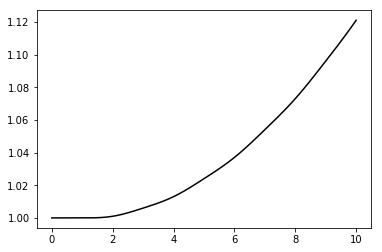

In [13]:

par[0] = 1
par[2] = 0.000
par[3] = -0.000
par[4] = 0.001
par[5] = -0.001
par[6] = 0.001
par[7] = -0.001
par[8] = 0.001
par[9] = -0.001
par[10] = 0.001
par[11] = -0.001
par[12] = 0.001





plt.plot( xpix, sm.result( xpix, par ), 'k-')
plt.show()

In [25]:
x = numpy.arange( 11, dtype=float )
knots = numpy.arange( 6, dtype=float ) * 2

part = numpy.zeros( (11,6), dtype=int )
ks = knots[0]
qq = []  
for k,ke in enumerate( knots[1:] ) :
    q = numpy.where( numpy.logical_and( ks <= x, x < ke ) )
    qq  += [q[0]]
    part[q,k] = 1
    ks = ke
print( q )
print( qq )
print( part )
print( x < knots[1:] )


(array([8, 9]),)
[array([0, 1]), array([2, 3]), array([4, 5]), array([6, 7]), array([8, 9])]
[[1 0 0 0 0 0]
 [1 0 0 0 0 0]
 [0 1 0 0 0 0]
 [0 1 0 0 0 0]
 [0 0 1 0 0 0]
 [0 0 1 0 0 0]
 [0 0 0 1 0 0]
 [0 0 0 1 0 0]
 [0 0 0 0 1 0]
 [0 0 0 0 1 0]
 [0 0 0 0 0 0]]


ValueError: operands could not be broadcast together with shapes (11,) (5,) 